In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import traceback
import time

In [36]:
token_df = pd.read_csv("206-token.csv")

In [37]:
cars_detail = []
counter = 0
for token in token_df.to_numpy()[:2300,1]:
    counter +=1
    if counter %20 == 0:
        print(counter)
#     if counter % 5 == 0:
#         time.sleep(2)
    try:
        URL = f"https://divar.ir/v/url/{token}"
        page = requests.get(URL)
        time.sleep(1)
        soup = BeautifulSoup(page.content, "html.parser")
        elms = soup.find_all("div", class_="kt-group-row-item--info-row")

        distance = elms[0].find_all('span')[1].get_text()
        model = elms[1].find_all('span')[1].get_text()
        color = elms[2].find_all('span')[1].get_text()


        elms = soup.find_all("div", class_="kt-unexpandable-row")
        price = None
        motor_status = None
        body_status = None 
        structure_status = None
        insurance_status = None
        for el in elms: 
            if len(el.find_all('p')) == 2:
                title = el.find_all('p')[0].get_text()
                value = el.find_all('p')[1].get_text()
                if 'موتور' in title:
                    motor_status = value
                elif 'قیمت' in title:
                    price = value
                elif 'شاسی' in title:
                    structure_status = value
                elif 'بدنه' in title:
                    body_status = value
                elif 'بیمه' in title:
                    insurance_status = value
        cars_detail.append([token,distance, model, color, price, motor_status, body_status, structure_status, insurance_status])
    except Exception as e:
#         print("Error !",token,  counter, "->", )#repr(e)
        time.sleep(10)
#         print(traceback.format_exc())
#         print("-----------------------")


20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240
1260
1280
1300
1320
1340
1360
1380
1400
1420
1440
1460
1480
1500
1520
1540
1560
1580
1600
1620
1640
1660
1680
1700
1720
1740
1760
1780
1800
1820
1840
1860
1880
1900
1920
1940
1960
1980
2000
2020
2040
2060
2080
2100
2120
2140
2160
2180
2200
2220
2240
2260
2280
2300


In [38]:
cars_df = pd.DataFrame(cars_detail, columns=['Token', 'Distance', 'Model', 'Color','Price', "Motor", "Body", 'Structure', "Insurance"])

In [39]:
cars_df.to_csv("Car_206_Dataset.csv")

In [40]:
cars_df

,Token,Distance,Model,Color,Price,Motor,Body,Structure,Insurance
0,AZ-1fYag,۸۳٬۰۰۰,۱۳۹۷,خاکستری,۳۸۸٬۰۰۰٬۰۰۰ تومان,سالم,رنگ‌شدگی,سالم و پلمپ,۱۱ ماه
1,AZ-1rcG1,۱۶۰٬۰۰۰,۱۳۸۸,سفید,۲۷۵٬۰۰۰٬۰۰۰ تومان,سالم,دوررنگ,سالم و پلمپ,۶ ماه
2,AZ-5PN-P,۱۶۰٬۰۰۰,۱۳۹۶,سفید,۳۵۰٬۰۰۰٬۰۰۰ تومان,سالم,خط و خش جزیی,سالم و پلمپ,۱۲ ماه
3,AZ-5P_R6,۶۰٬۰۰۰,۱۳۸۳,خاکستری,۲۴۰٬۰۰۰٬۰۰۰ تومان,سالم,خط و خش جزیی,سالم و پلمپ,None
4,AZ-5_3Yv,۲۵۰٬۰۰۰,۱۳۸۳,تیتانیوم,۱۸۵٬۰۰۰٬۰۰۰ تومان,سالم,سالم و بی‌خط و خش,سالم و پلمپ,۸ ماه
...,...,...,...,...,...,...,...,...,...
2092,AZXqAZIM,۱۲۰٬۰۰۰,۱۳۹۴,سفید,۱۵۰٬۰۰۰٬۰۰۰ تومان,سالم,سالم و بی‌خط و خش,سالم و پلمپ,۸ ماه
2093,AZXqEgku,۳۰۰٬۰۰۰,۱۳۸۱,مشکی,۱۵۵٬۰۰۰٬۰۰۰ تومان,سالم,رنگ‌شدگی,سالم و پلمپ,۹ ماه
2094,AZXqJ5ym,۳۱۰٬۰۰۰,۱۳۸۵,بژ,۲۳۰٬۰۰۰٬۰۰۰ تومان,سالم,رنگ‌شدگی,سالم و پلمپ,۲ ماه
2095,AZXqTadz,۷۴٬۰۰۰,۱۳۹۸,سفید,۳۴۸٬۰۰۰٬۰۰۰ تومان,سالم,رنگ‌شدگی,سالم و پلمپ,۶ ماه


## Load Dataset

In [295]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [296]:
df = pd.read_csv("Car_206_Dataset.csv")

In [297]:
df.head()

,Unnamed: 0,Token,Distance,Model,Color,Price,Motor,Body,Structure,Insurance
0,0,AZ-1fYag,۸۳٬۰۰۰,۱۳۹۷,خاکستری,۳۸۸٬۰۰۰٬۰۰۰ تومان,سالم,رنگ‌شدگی,سالم و پلمپ,۱۱ ماه
1,1,AZ-1rcG1,۱۶۰٬۰۰۰,۱۳۸۸,سفید,۲۷۵٬۰۰۰٬۰۰۰ تومان,سالم,دوررنگ,سالم و پلمپ,۶ ماه
2,2,AZ-5PN-P,۱۶۰٬۰۰۰,۱۳۹۶,سفید,۳۵۰٬۰۰۰٬۰۰۰ تومان,سالم,خط و خش جزیی,سالم و پلمپ,۱۲ ماه
3,3,AZ-5P_R6,۶۰٬۰۰۰,۱۳۸۳,خاکستری,۲۴۰٬۰۰۰٬۰۰۰ تومان,سالم,خط و خش جزیی,سالم و پلمپ,NaN
4,4,AZ-5_3Yv,۲۵۰٬۰۰۰,۱۳۸۳,تیتانیوم,۱۸۵٬۰۰۰٬۰۰۰ تومان,سالم,سالم و بی‌خط و خش,سالم و پلمپ,۸ ماه


## Preprocessing 

### Remove & Fill Null Value

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2097 non-null   int64 
 1   Token       2097 non-null   object
 2   Distance    2097 non-null   object
 3   Model       2097 non-null   object
 4   Color       2097 non-null   object
 5   Price       2097 non-null   object
 6   Motor       2051 non-null   object
 7   Body        2097 non-null   object
 8   Structure   2049 non-null   object
 9   Insurance   1964 non-null   object
dtypes: int64(1), object(9)
memory usage: 164.0+ KB


In [299]:
df = df.dropna(subset=['Insurance'])

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2096
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1964 non-null   int64 
 1   Token       1964 non-null   object
 2   Distance    1964 non-null   object
 3   Model       1964 non-null   object
 4   Color       1964 non-null   object
 5   Price       1964 non-null   object
 6   Motor       1953 non-null   object
 7   Body        1964 non-null   object
 8   Structure   1927 non-null   object
 9   Insurance   1964 non-null   object
dtypes: int64(1), object(9)
memory usage: 168.8+ KB


In [301]:
df['Motor'] = df['Motor'].fillna(df['Motor'].mode()[0])
df['Structure'] = df['Structure'].fillna(df['Structure'].mode()[0])

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2096
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1964 non-null   int64 
 1   Token       1964 non-null   object
 2   Distance    1964 non-null   object
 3   Model       1964 non-null   object
 4   Color       1964 non-null   object
 5   Price       1964 non-null   object
 6   Motor       1964 non-null   object
 7   Body        1964 non-null   object
 8   Structure   1964 non-null   object
 9   Insurance   1964 non-null   object
dtypes: int64(1), object(9)
memory usage: 168.8+ KB


## Convert Data Format

In [303]:
from unidecode import unidecode

### Distance

In [304]:
df['Distance'].head()

0     ۸۳٬۰۰۰
1    ۱۶۰٬۰۰۰
2    ۱۶۰٬۰۰۰
4    ۲۵۰٬۰۰۰
5    ۱۳۰٬۰۰۰
Name: Distance, dtype: object

In [305]:
df['Distance'] = df['Distance'].apply(lambda row: int(unidecode(row).replace(",",'')))

In [306]:
df['Distance'].head()

0     83000
1    160000
2    160000
4    250000
5    130000
Name: Distance, dtype: int64

### Model

In [307]:
df['Model'].head()

0    ۱۳۹۷
1    ۱۳۸۸
2    ۱۳۹۶
4    ۱۳۸۳
5    ۱۳۹۶
Name: Model, dtype: object

In [308]:
df['Model'] = df['Model'].apply(lambda row: int(unidecode(row)))

In [309]:
df['Model'].head()

0    1397
1    1388
2    1396
4    1383
5    1396
Name: Model, dtype: int64

### Color

In [310]:
df['Color'].value_counts()

سفید          1011
نقره‌ای        256
خاکستری        247
مشکی           111
نوک‌مدادی       81
سفید صدفی       52
بژ              43
یشمی            32
آلبالویی        23
قرمز            20
آبی             19
نقرآبی          11
قهوه‌ای          8
دلفینی           8
مسی              8
گیلاسی           8
بادمجانی         7
سرمه‌ای          6
طوسی             3
تیتانیوم         2
ذغالی            2
سبز              2
نارنجی           2
پوست‌پیازی       2
Name: Color, dtype: int64

In [311]:
df['Color'] = df['Color'].apply(lambda row: row.strip())

In [312]:
df['Color'].value_counts()

سفید          1011
نقره‌ای        256
خاکستری        247
مشکی           111
نوک‌مدادی       81
سفید صدفی       52
بژ              43
یشمی            32
آلبالویی        23
قرمز            20
آبی             19
نقرآبی          11
قهوه‌ای          8
دلفینی           8
مسی              8
گیلاسی           8
بادمجانی         7
سرمه‌ای          6
طوسی             3
تیتانیوم         2
ذغالی            2
سبز              2
نارنجی           2
پوست‌پیازی       2
Name: Color, dtype: int64

### Price 

In [313]:
df['Price'].head()

0    ۳۸۸٬۰۰۰٬۰۰۰ تومان
1    ۲۷۵٬۰۰۰٬۰۰۰ تومان
2    ۳۵۰٬۰۰۰٬۰۰۰ تومان
4    ۱۸۵٬۰۰۰٬۰۰۰ تومان
5    ۳۷۰٬۰۰۰٬۰۰۰ تومان
Name: Price, dtype: object

In [314]:
df['Price'] = df['Price'].apply(lambda row: int(unidecode(row.split(" ")[0]).replace(",",'')))

In [315]:
df['Price'].head()

0    388000000
1    275000000
2    350000000
4    185000000
5    370000000
Name: Price, dtype: int64

### Motor

In [316]:
df['Motor'].value_counts()

سالم             1927
تعویض شده          21
نیاز به تعمیر      16
Name: Motor, dtype: int64

In [317]:
df['Motor'] = df['Motor'].apply(lambda row: row.strip())

In [318]:
df['Motor'] = df['Motor'].apply(lambda row: 'Health' if 'سالم' in row else ("Changed" if 'تعویض' in row else 'Need_Fix') )

In [319]:
df['Motor'].value_counts()

Health      1927
Changed       21
Need_Fix      16
Name: Motor, dtype: int64

### Body

In [196]:
df['Body'].value_counts()

سالم و بی‌خط و خش       719
خط و خش جزیی            432
رنگ‌شدگی                413
دوررنگ                  257
صافکاری بی‌رنگ           53
تمام‌رنگ                 47
رنگ‌شدگی، در ۲ ناحیه     18
رنگ‌شدگی، در ۱ ناحیه     13
تصادفی                   12
Name: Body, dtype: int64

In [197]:
def encode_body_values(state):
    if 'سالم' in state:
        return 7
    elif 'خط' in state:
        return 6
    elif 'صافکاری' in state:
        return 5 
    elif 'شدگی' in state:
        return 4
    elif 'دوررنگ' in state:
        return 3
    elif 'تمام' in state:
        return 2
    elif 'تصادفی':
        return 1

In [320]:
df['Body'] = df['Body'].apply(lambda row:encode_body_values(row))

In [321]:
df['Body'].value_counts()

7    719
4    444
6    432
3    257
5     53
2     47
1     12
Name: Body, dtype: int64

### Structure   

In [322]:
df['Structure'].value_counts()

سالم و پلمپ    1924
ضربه‌خورده       38
رنگ‌شده           2
Name: Structure, dtype: int64

In [323]:
df['Structure'] = df['Structure'].apply(lambda row: row.strip())

### Insurance

In [324]:
df['Insurance'].value_counts()

۶ ماه     321
۱۲ ماه    230
۹ ماه     217
۱۰ ماه    187
۸ ماه     164
۴ ماه     147
۳ ماه     146
۵ ماه     134
۷ ماه     133
۱۱ ماه    118
۱ ماه      88
۲ ماه      79
Name: Insurance, dtype: int64

In [325]:
df['Insurance'] = df['Insurance'].apply(lambda row: int(unidecode(row.split(" ")[0])))

In [326]:
df['Insurance'].value_counts()

6     321
12    230
9     217
10    187
8     164
4     147
3     146
5     134
7     133
11    118
1      88
2      79
Name: Insurance, dtype: int64

### Remove Extra Columns

In [327]:
df2 = df.drop(columns=['Token'])

In [328]:
df2 = df2.drop(columns=[df.columns[0]])

## Data Visualization

In [336]:
import seaborn as sns

In [329]:
df2.head()

,Distance,Model,Color,Price,Motor,Body,Structure,Insurance
0,83000,1397,خاکستری,388000000,Health,4,سالم و پلمپ,11
1,160000,1388,سفید,275000000,Health,3,سالم و پلمپ,6
2,160000,1396,سفید,350000000,Health,6,سالم و پلمپ,12
4,250000,1383,تیتانیوم,185000000,Health,7,سالم و پلمپ,8
5,130000,1396,مشکی,370000000,Health,4,سالم و پلمپ,6


In [330]:
df2.describe()

,Distance,Model,Price,Body,Insurance
count,1964.000000,1964.000000,1.964000e+03,1964.000000,1964.000000
mean,171060.589613,1391.707739,3.262409e+08,5.368126,7.124236
std,119901.822619,15.310877,3.787221e+08,1.616403,3.190479
min,0.000000,1380.000000,1.000000e+07,1.000000,1.000000
25%,68000.000000,1385.000000,2.250000e+08,4.000000,5.000000
50%,160000.000000,1390.000000,3.000000e+08,6.000000,7.000000
75%,254250.000000,1398.000000,4.000000e+08,7.000000,10.000000
max,500000.000000,2005.000000,1.111111e+10,7.000000,12.000000


### Distance vs Price

In [331]:
max_outlier_bound, min_outlier_bound = df2['Price'].quantile(0.9965), df2['Price'].quantile(0.02)
max_outlier_bound, min_outlier_bound

(692303888.7450035, 111111111.0)

In [332]:
df2 = df2[df2['Price'] < max_outlier_bound]

In [333]:
df2 = df2[df2['Price'] > min_outlier_bound]

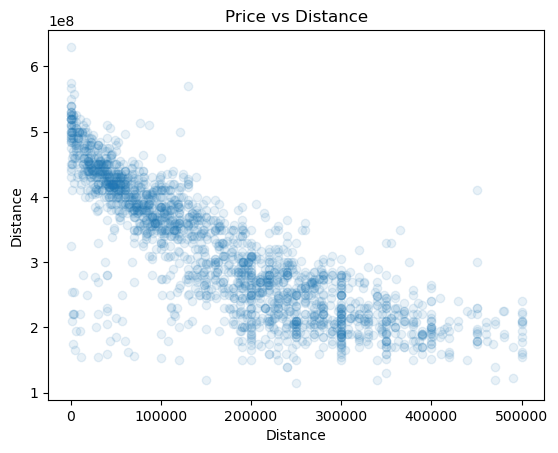

In [334]:
plt.scatter(df2['Distance'], df2["Price"], alpha=0.1)
plt.xlabel("Distance")
plt.ylabel("Distance")
plt.title("Price vs Distance");

### Color vs Price

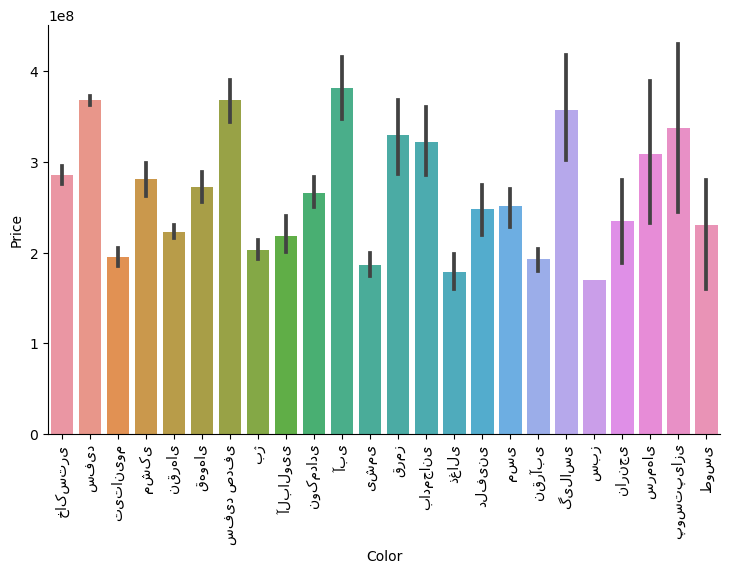

In [371]:
sns.catplot( data=df2, x='Color', y='Price', kind='bar', aspect = 1.5, height=5)
plt.xticks(rotation=90);

### Model vs Price

In [384]:
df2['Model']= df2['Model'].apply(lambda row: 1384 if row == 2005 else row)

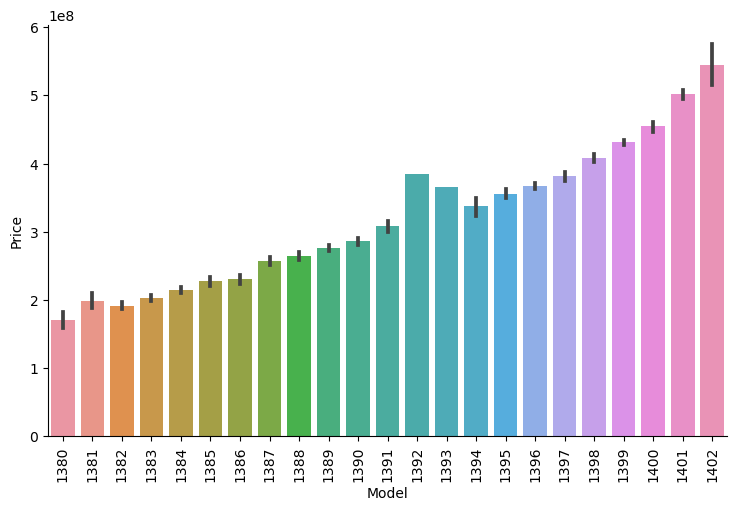

In [395]:
sns.catplot( data=df2, x='Model', y='Price', kind='bar', aspect = 1.5, height=5)
plt.xticks(rotation=90);

### Body vs Price

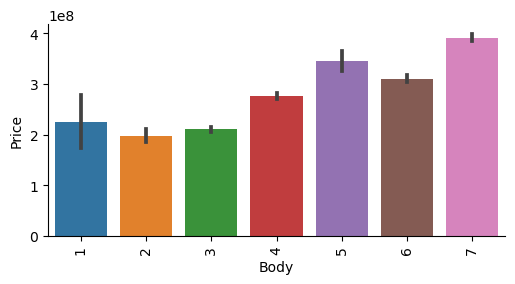

In [393]:
sns.catplot( data=df2, x='Body', y='Price', kind='bar', aspect = 1.75, height=3)
plt.xticks(rotation=90);

### Structure vs Price

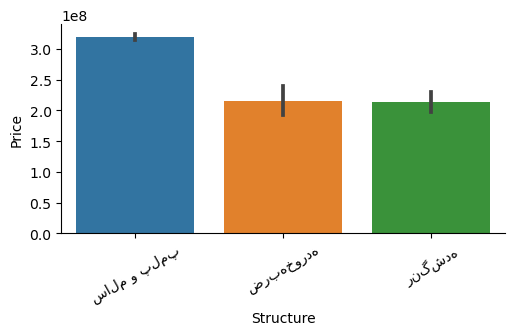

In [398]:
sns.catplot( data=df2, x='Structure', y='Price', kind='bar', aspect = 1.75, height=3)
plt.xticks(rotation=30);

<AxesSubplot:>

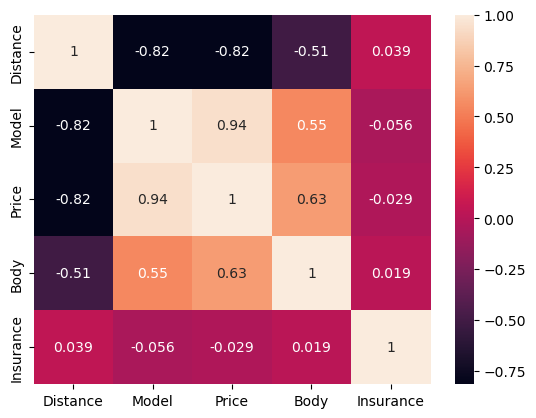

In [482]:
sns.heatmap(df2.corr(), annot=True)

## Preprocessing

In [400]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1912 entries, 0 to 2096
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Distance   1912 non-null   int64 
 1   Model      1912 non-null   int64 
 2   Color      1912 non-null   object
 3   Price      1912 non-null   int64 
 4   Motor      1912 non-null   object
 5   Body       1912 non-null   int64 
 6   Structure  1912 non-null   object
 7   Insurance  1912 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 134.4+ KB


### One Hot Encoding Color & Motor Columns

In [402]:
df_encoded = pd.get_dummies(df2, columns = ['Color', 'Motor'])

In [403]:
df_encoded

,Distance,Model,Price,Body,Structure,Insurance,Color_آبی,Color_آلبالویی,Color_بادمجانی,Color_بژ,...,Color_نارنجی,Color_نقرآبی,Color_نقره‌ای,Color_نوک‌مدادی,Color_پوست‌پیازی,Color_گیلاسی,Color_یشمی,Motor_Changed,Motor_Health,Motor_Need_Fix
0,83000,1397,388000000,4,سالم و پلمپ,11,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,160000,1388,275000000,3,سالم و پلمپ,6,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,160000,1396,350000000,6,سالم و پلمپ,12,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,250000,1383,185000000,7,سالم و پلمپ,8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,130000,1396,370000000,4,سالم و پلمپ,6,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,120000,1394,150000000,7,سالم و پلمپ,8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2093,300000,1381,155000000,4,سالم و پلمپ,9,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2094,310000,1385,230000000,4,سالم و پلمپ,2,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2095,74000,1398,348000000,4,سالم و پلمپ,6,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Ordinal Encoding Strucure Column

In [404]:
df_encoded['Structure'] = df_encoded['Structure'].apply(lambda row: 3 if 'سالم' in row else (2 if 'ضربه' in row else 1))

In [405]:
df_encoded

,Distance,Model,Price,Body,Structure,Insurance,Color_آبی,Color_آلبالویی,Color_بادمجانی,Color_بژ,...,Color_نارنجی,Color_نقرآبی,Color_نقره‌ای,Color_نوک‌مدادی,Color_پوست‌پیازی,Color_گیلاسی,Color_یشمی,Motor_Changed,Motor_Health,Motor_Need_Fix
0,83000,1397,388000000,4,3,11,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,160000,1388,275000000,3,3,6,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,160000,1396,350000000,6,3,12,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,250000,1383,185000000,7,3,8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,130000,1396,370000000,4,3,6,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,120000,1394,150000000,7,3,8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2093,300000,1381,155000000,4,3,9,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2094,310000,1385,230000000,4,3,2,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2095,74000,1398,348000000,4,3,6,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Train Test Split

In [408]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [407]:
X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

In [409]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scaling Data

In [433]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train Model

In [434]:
from sklearn.linear_model import LinearRegression

In [435]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [436]:
y_pred = lr_model.predict(X_test)

## Evaluate

In [437]:
from sklearn.metrics import r2_score, mean_squared_error

In [438]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [439]:
print(f"R2 Score = {r2:.2f}")
print(f"MSE = {mse}")

R2 Score = 0.91
MSE = 778756088574878.8


In [455]:
i = 111
y_test.to_numpy()[i], y_pred[i]

(250000000, 265943232.46135616)

## Save Model

In [457]:
import pickle

In [458]:
pickle.dump(scaler, open('Scaler.pkl', 'wb'))
pickle.dump(lr_model, open('CarPricePredictionModel.pkl', 'wb'))

## Predict Script

In [472]:
def predict_car_price(car_feature, car_price, treshold = 0.05):
    import warnings
    warnings.filterwarnings("ignore")
    
    model = pickle.load(open('CarPricePredictionModel.pkl', 'rb'))
    scaler = pickle.load(open('Scaler.pkl', 'rb'))
    x_train = scaler.transform([car_feature])
    y_predicted = model.predict(x_train)
    
    state = 'OK' if car_price <= (1+treshold) * round(y_predicted[0]) else 'Not OK'
    
    return round(y_predicted[0]), state, car_price

In [475]:
i = 10
predict_car_price(X.to_numpy()[0], y[i])

(383119040, 'Not OK', 433000000)